### Código entregávavel para o trabalho final da disciplina de aprendizado de máquina

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.compose import ColumnTransformer

from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    classification_report,
    precision_recall_curve,
    make_scorer,
    roc_curve,
    roc_auc_score,
    ConfusionMatrixDisplay
)

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [78]:
df = pd.read_csv("dados.csv", sep=",", index_col=0)
print(df.shape)
df.head(10)

(2100, 52)


,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,feat_11,feat_12,feat_13,feat_14,feat_15,feat_16,feat_17,feat_18,feat_19,feat_20,feat_21,feat_22,feat_23,feat_24,feat_25,feat_26,feat_27,feat_28,feat_29,feat_30,feat_31,feat_32,feat_33,feat_34,feat_35,feat_36,feat_37,feat_38,feat_39,feat_40,feat_41,feat_42,feat_43,feat_44,feat_45,feat_46,feat_47,feat_48,feat_49,feat_50,feat_51,class
0,0.276295,1.294890,0.888687,1.763403,1.924051,-1.525458,0.736443,2.179009,-0.015214,-1.211330,-1.605758,-1.516986,0.452917,1.539990,-2.695154,-0.694768,0.116015,-0.902927,0.726539,0.018195,-1.021129,-0.263767,0.166222,0.348323,0.020840,0.793667,-0.301532,-0.534510,-1.251319,1.129450,0.000000,2.268332,0.841226,-3.360524,1.189377,-0.075143,1.873653,-0.242981,-0.338032,2.571654,0.392259,1.133639,0.753638,-0.461635,-0.436963,0.617467,2.182922,1.146251,-0.552142,-4.425882,0.116849,0
1,0.677212,0.185459,0.064948,0.073792,0.084700,0.282421,0.698945,-0.054451,-0.778294,1.831007,-0.273588,1.073080,0.166007,-1.732561,-0.912316,0.851411,1.785941,-1.253563,-0.186809,1.401132,-0.085340,0.526111,0.436409,-0.649572,-0.256274,-1.519432,0.771908,1.174472,0.789905,2.062833,0.841471,-0.599389,0.204197,-2.872712,-0.067962,-0.260144,-0.006961,0.425915,1.484322,-2.563290,0.559547,0.150324,0.668149,0.784069,0.393311,-0.293001,-0.983352,-0.895915,-0.731225,-2.093978,1.235367,1
2,-1.044824,0.310883,0.227623,0.594970,1.384309,1.307542,0.788633,-3.694418,0.727152,0.931730,-0.974124,2.256576,-1.768044,-0.379099,0.376770,1.024410,-0.198548,0.643067,-1.381193,-0.355321,1.291931,-0.298303,-0.418110,0.115936,-1.262449,-1.314242,0.445781,-1.185331,0.137530,0.047373,0.000000,-0.879647,0.632379,-0.441928,-0.832599,-1.694252,0.129320,0.847070,-0.745285,-0.069607,0.526927,0.989212,2.407056,0.834948,0.214112,0.840987,-0.143899,0.469351,0.124603,5.336205,1.715460,0
3,-0.913868,-0.670931,0.119123,-2.052029,-1.431409,1.500219,0.038840,-1.338867,-0.665248,-0.385238,-0.810513,1.155375,0.205783,0.462061,-1.263745,0.825768,0.362406,2.994536,-0.582957,-1.526654,-0.187893,0.457844,-0.079696,1.326116,0.347789,-0.187950,1.366555,-0.751030,0.010243,0.801725,0.841471,-2.757326,-0.501219,-0.713442,-0.638641,-1.079036,-0.874408,0.225632,-1.483366,0.163325,0.388522,-1.237875,1.397313,-0.626133,-0.587009,-1.512317,1.518929,-0.755945,-1.248030,-2.261296,0.338201,1
4,1.534146,1.599091,1.373254,0.225192,0.293527,-0.890291,-0.741208,-1.887151,1.226785,-0.216320,-2.416734,0.904471,0.114940,-0.448195,0.335013,1.248772,-0.025486,0.008194,2.082845,-0.129294,1.229131,1.131166,-0.368647,0.884217,0.422384,-0.474269,-0.106739,0.319817,0.595563,-1.375159,0.841471,-0.804633,0.569745,-0.492743,-1.064220,0.108120,-1.434265,-0.476129,1.424514,1.222318,-0.179111,-0.008038,1.129395,-0.394848,-0.734817,1.450767,-0.526408,-0.381483,-0.921186,-0.371460,-0.843425,1
5,0.866745,-1.029476,-0.587077,0.522505,2.015740,0.849283,-0.580701,-2.163868,0.647217,1.439617,-1.048895,-1.486627,-0.091930,-1.002495,1.498127,0.731550,0.288714,1.967877,1.054662,0.813534,1.326517,1.241307,-0.500374,-0.196675,-0.599432,-0.118465,0.026646,0.507716,-0.329259,0.625364,0.000000,1.341940,-0.917329,1.223656,-0.366323,0.538076,1.328223,-1.200238,-1.376203,-0.188849,-0.804619,-2.591095,0.129865,-0.280689,0.902322,0.779620,-0.404399,-1.722684,0.987141,-4.409404,0.465265,0
6,0.167544,0.824305,-2.003820,0.379536,0.863169,1.525842,0.520568,-0.660804,0.029959,-0.341884,-0.531620,-0.851350,-0.051197,0.101963,0.048107,0.137852,-4.513312,-0.351860,0.398384,-1.171783,-0.887088,-0.841316,-1.141247,-0.524963,-0.530186,-0.412936,-0.647081,1.144177,1.224460,-0.725574,0.000000,-0.358235,1.867382,-0.627581,-0.400179,1.265139,0.305695,0.015188,-0.546696,-1.363539,-0.541220,-0.910714,-1.221258,0.800417,-0.326276,-1.698543,-1.224646,-0.019549,-1.042409,-0.425528,1.275236,0
7,-1.651540,0.168693,0.429007,-0.163278,-1.264337,-0.026900,0.672453,0.398724,-1.556537,-2.007304,0.405354,0.000072,-0.058015,0.248226,1.973733,0.278746,0.113733,-0.732109,1.186893

### Verficicações iniciais de qualidade dos dados

In [79]:
print(f"tipos de dados: {df.dtypes.value_counts()}")
print(f"o número de nulos é: {sum(df.isnull().sum())}")
print(f"O número de duplicados é: {df.duplicated().sum()}")

print(f"o valor minímo obs é: {df.min().min()}")
print(f"o valor máximo obs é: {df.max().max()}")
df.info()

tipos de dados: float64    51
int64       1
Name: count, dtype: int64
o número de nulos é: 0
O número de duplicados é: 0
o valor minímo obs é: -6.683251909121917
o valor máximo obs é: 6.884138227305336
<class 'pandas.core.frame.DataFrame'>
Index: 2100 entries, 0 to 2099
Data columns (total 52 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   feat_1   2100 non-null   float64
 1   feat_2   2100 non-null   float64
 2   feat_3   2100 non-null   float64
 3   feat_4   2100 non-null   float64
 4   feat_5   2100 non-null   float64
 5   feat_6   2100 non-null   float64
 6   feat_7   2100 non-null   float64
 7   feat_8   2100 non-null   float64
 8   feat_9   2100 non-null   float64
 9   feat_10  2100 non-null   float64
 10  feat_11  2100 non-null   float64
 11  feat_12  2100 non-null   float64
 12  feat_13  2100 non-null   float64
 13  feat_14  2100 non-null   float64
 14  feat_15  2100 non-null   float64
 15  feat_16  2100 non-null   float64
 16  feat_17

### Separação entre treino e teste, vou usar CV pra escolher o modelo 

In [80]:
features = df.columns.tolist()[:-1]
resposta = df["class"]

stratify = sum(resposta) / len(resposta)  # 38% na classe 1

x_train, x_test, y_train, y_test = train_test_split(
    df[features], resposta, train_size=0.6, random_state=42, stratify=resposta
)


### Análise descritiva

In [81]:
pd.set_option("display.max_columns", None)  # não limitar nº de colunas
pd.set_option("display.width", None)  # não quebrar linha
x_train.describe()  # features diferentes: 8, 17, 31, 50

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,feat_11,feat_12,feat_13,feat_14,feat_15,feat_16,feat_17,feat_18,feat_19,feat_20,feat_21,feat_22,feat_23,feat_24,feat_25,feat_26,feat_27,feat_28,feat_29,feat_30,feat_31,feat_32,feat_33,feat_34,feat_35,feat_36,feat_37,feat_38,feat_39,feat_40,feat_41,feat_42,feat_43,feat_44,feat_45,feat_46,feat_47,feat_48,feat_49,feat_50,feat_51
count,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000
mean,-0.019906,-0.034646,0.026173,0.004962,-0.001701,0.031246,-0.022260,0.024817,0.008773,-0.011862,0.005233,0.029570,0.012592,-0.044649,-0.006597,0.024350,0.038570,0.028391,-0.015579,0.009652,-0.016283,-0.003802,0.019952,0.031024,-0.009344,-0.033067,0.005133,0.070990,0.007115,-0.002774,0.320560,0.016545,0.025654,-0.023056,-0.023250,0.010662,-0.051183,-0.022314,0.030484,0.008838,0.027267,0.050854,-0.051247,0.021546,0.026471,-0.015645,-0.001355,0.008738,0.002775,-0.063431,0.004445
std,0.995311,1.002871,1.025605,0.955300,0.989132,1.000425,1.003691,2.093992,0.977656,0.958666,0.999607,0.999447,0.997871,1.025085,1.016272,0.993314,2.184160,1.012891,1.009031,0.980573,1.016357,1.018199,1.013638,0.999121,1.017741,1.015962,0.930735,1.003939,1.006616,0.997666,0.408798,1.008448,1.025967,1.023932,1.006919,1.016639,0.972426,1.002786,0.985105,0.975732,1.028637,1.013486,0.975339,0.982986,1.015120,0.984303,1.011844,1.024091,0.988055,2.189436,1.004671
min,-3.856375,-3.069851,-3.288157,-3.495045,-3.076196,-3.329504,-3.631539,-6.683252,-3.236900,-3.065139,-3.419596,-3.012140,-3.018198,-4.462969,-3.940008,-3.249764,-6.200740,-3.321115,-3.817043,-2.801130,-3.140778,-2.912160,-3.189730,-3.335902,-2.982542,-3.419906,-2.917363,-3.726141,-3.203346,-2.957032,0.000000,-3.532818,-3.436062,-3.393915,-3.367806,-2.941628,-3.421380,-3.197353,-3.705150,-3.475037,-3.427575,-2.934290,-2.911550,-3.922400,-3.334893,-3.601085,-3.323452,-3.094289,-2.765448,-5.715060,-3.200570
25%,-0.684059,-0.729225,-0.721587,-0.650783,-0.626083,-0.592542,-0.680317,-0.949998,-0.649562,-0.655611,-0.702065,-0.678386,-0.654761,-0.739777,-0.687556,-0.631179,-0.910121,-0.688478,-0.680121,-0.670709,-0.699979,-0.662239,-0.683604,-0.647683,-0.662660,-0.717320,-0.612746,-0.593418,-0.675191,-0.697864,0.000000,-0.682144,-0.653153,-0.732284,-0.672502,-0.687566,-0.727290,-0.710420,-0.618376,-0.617934,-0.690156,-0.603643,-0.683448,-0.598081,-0.619806,-0.661776,-0.683471,-0.677133,-0.690972,-0.653366,-0.672048
50%,-0.035772,-0.032077,-0.004034,0.002591,0.018811,0.028280,0.016639,0.029077,-0.017475,0.002336,-0.027791,0.037690,0.001447,-0.052738,-0.008698,0.055812,0.017584,-0.011129,-0.022898,0.022632,-0.028644,-0.004673,-0.013706,0.022385,-0.008313,-0.035601,-0.003543,0.089260,-0.000589,0.030580,0.000000,0.032860,0.014476,-0.006061,-0.034033,-0.013712,-0.018596,-0.031386,0.000354,0.031614,0.078645,0.076427,-0.032866,0.031876,-0.003442,-0.005158,-0.007496,0.020015,-0.013929,-0.018984,0.026377
75%,0.638251,0.661412,0.739236,0.631248,0.678208,0.675638,0.662566,1.085587,0.665838,0.613619,0.675619,0.734345,0.672308,0.629124,0.669052,0.699816,0.894414,0.754893,0.674795,0.702428,0.706144,0.683463,0.705767,0.707598,0.675712,0.669324,0.614416,0.749162,0.692748,0.666532,0.841471,0.718453,0.671637,0.715127,0.657831,0.728940,0.624651,0.671392,0.748981,0.677853,0.724009,0.705075,0.589381,0.705420,0.703056,0.663254,0.711648,0.673946,0.692669,0.594718,0.686481
max,2.893315,3.495113,3.383737,3.222928,3.269907,3.5486

In [82]:
print(x_train[["feat_8", "feat_17", "feat_31", "feat_50"]].head(20))
# Conseguimos ver que entre as variáveis que destaquei a 31 assume apenas dois valores

        feat_8   feat_17   feat_31   feat_50
2081 -0.249021  5.257643  0.000000  0.238774
1665 -0.996602 -0.338418  0.841471 -1.452945
1762  0.160811 -0.523333  0.000000  0.990070
584  -5.450207  0.459122  0.000000  1.252115
178   2.095665  0.095681  0.841471  0.599772
517  -2.956909 -1.074030  0.000000 -4.856452
821   0.338257 -1.997410  0.000000  4.611474
840   0.562285 -4.142501  0.000000 -0.054543
293   0.912854 -1.810145  0.000000  3.969876
1959 -0.257174 -2.343029  0.000000 -4.028567
1018  2.795621  0.393762  0.000000  4.414915
1261 -0.124276  5.864964  0.000000  1.718074
1775 -0.656507  5.017727  0.000000 -1.391558
641   1.460675  0.475004  0.841471 -1.668035
2093  0.444425  0.101263  0.000000  0.794986
939  -0.643275  0.395339  0.000000  0.661201
1005 -0.248061 -1.767670  0.841471 -2.468635
1270  0.382737 -0.939249  0.841471 -2.134993
1962  2.264328  0.427713  0.841471 -0.925424
1799 -0.265573  2.896281  0.000000 -4.154621


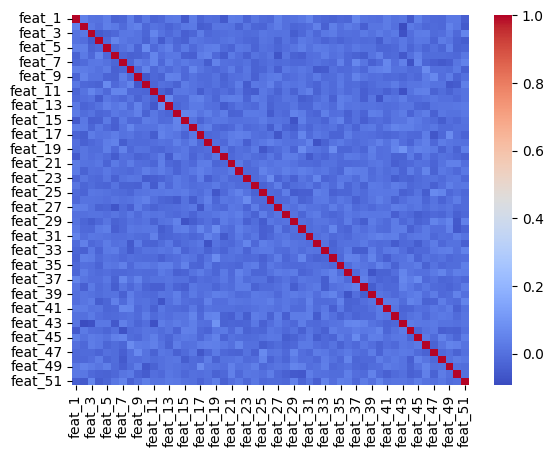

In [83]:
corr = x_train.corr()  # nenhuma variável apresenta correlação linear
sns.heatmap(corr, cmap="coolwarm")
plt.show()

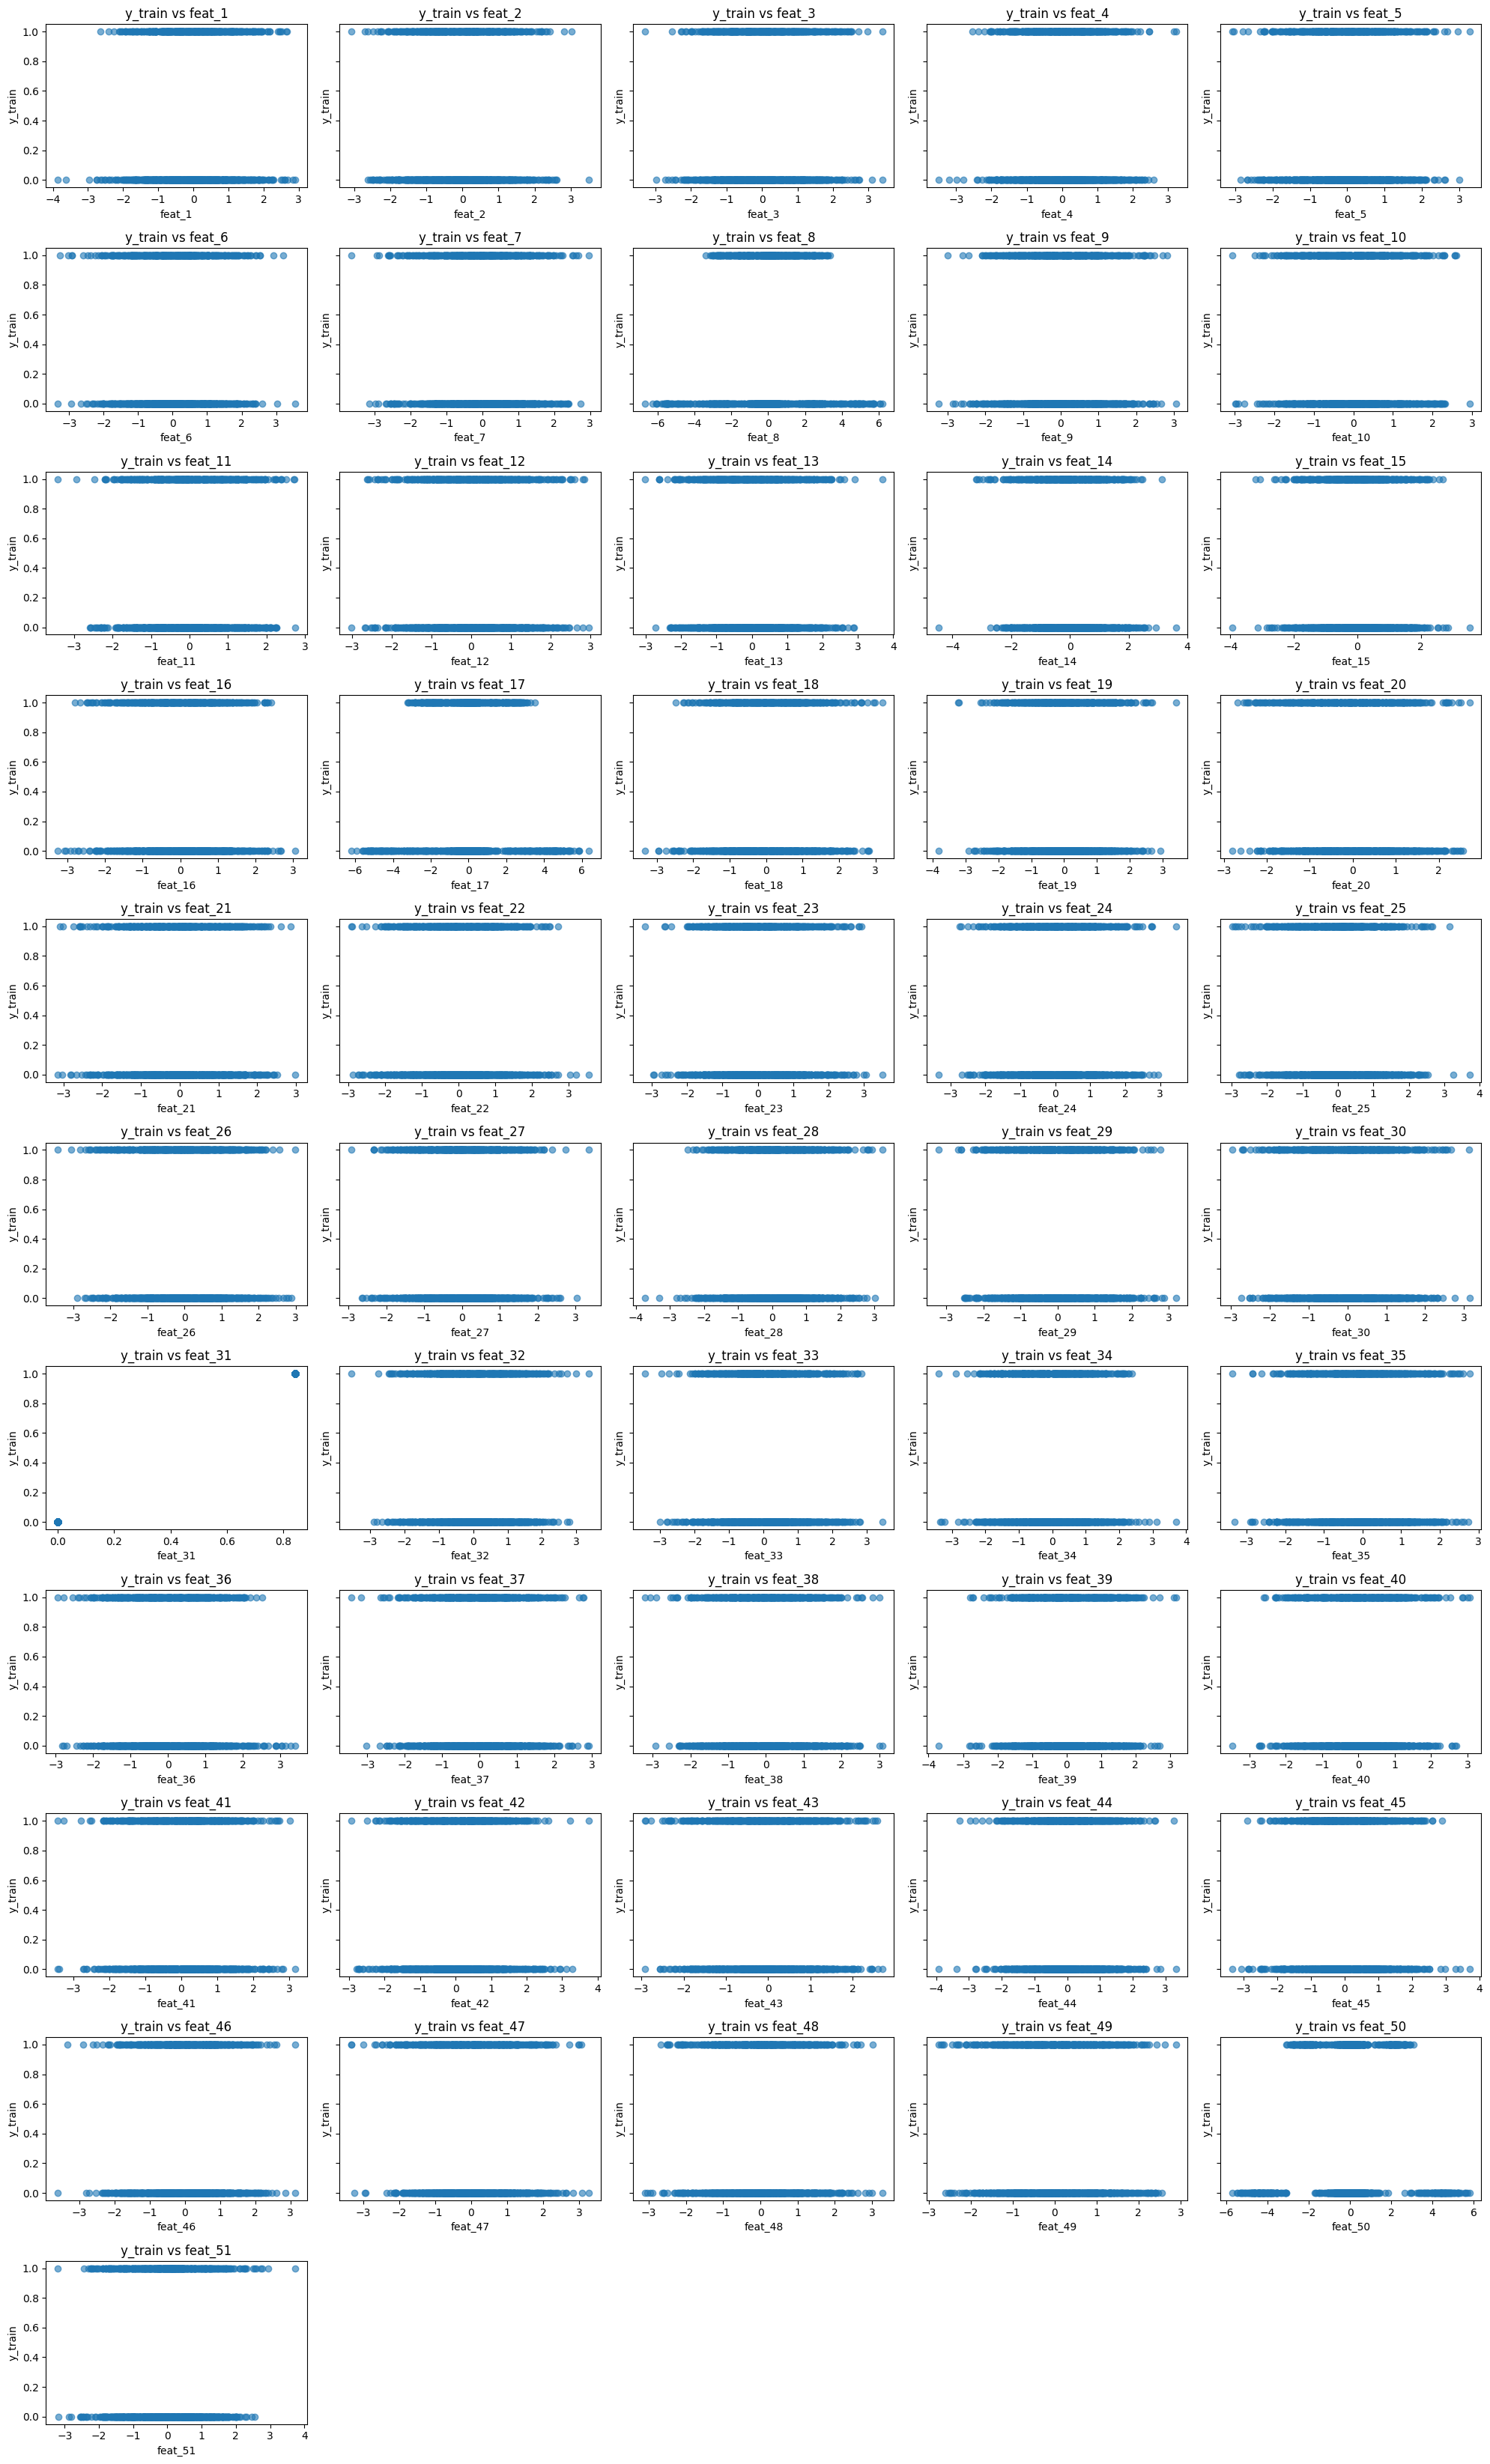

In [84]:
n_feats = len(features)
n_cols = 5
n_rows = -(-n_feats // n_cols)  # teto da divisão

fig, axes = plt.subplots(n_rows, n_cols, figsize=(4 * n_cols, 3 * n_rows), sharey=True)
axes = axes.flatten()

for i, feature in enumerate(features):
    axes[i].scatter(x_train[feature], y_train, alpha=0.6)
    axes[i].set_title(f"y_train vs {feature}")
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("y_train")

# apaga axes sobrando
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()

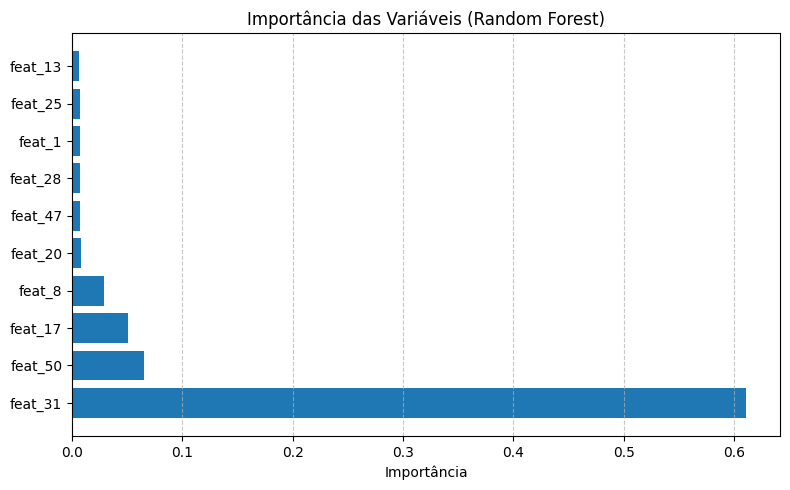

In [85]:
model = RandomForestClassifier(
    random_state=42, n_estimators=100, min_samples_leaf=10, max_features="log2"
)
model.fit(x_train, y_train)

importances = model.feature_importances_
indices = np.argsort(importances)

myClassifiers = pd.Series(model.feature_importances_, index=x_train.columns)
myClassifiers.sort_values(ascending=False, inplace=True)
top_10 = pd.DataFrame(myClassifiers.head(10))


plt.figure(figsize=(8, 5))
plt.barh(top_10.index, top_10[0])
plt.xlabel("Importância")
plt.title("Importância das Variáveis (Random Forest)")
plt.grid(True, axis="x", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

### Comentários sobre a análise descritiva
- Primeiramente, vamos considerar a covariável 31 como vazamento de informações, pois ela separa 100% da variável resposta.
- As variáveis que podem ser destacadas como diferentes das outras são a 8, 17 e 50. 
- Com exceção das variáveis destacas nenhuma das outras parecem ser efetivas para predição do nosso problema. 
- Com base nas informações obtidas, vamos agora testar os modelos. Primeiramente vamos testar um KNN com as 3 principais covariáveis, pois em problemas de baixa dimensionalidade o KNN tende a ser um algoritmo muito preciso.

#### Abaixo vou falar duas abordagens que eu tinha pensado em testar também, mas aqui eu trouxe o que achei melhor (KNN), mas eu rodei eles de maneira rápida no codigo chamado análise. 
- As outras abordagens que eu pensei em aplicar seriam uma regressão logística discretizando principalmente a variável 50 criando classes ( pelo comportamento do gráfico de dispersão é possivel ver que diferentes valores dela apresentam diferentes respostas).
- Também rodei dois modelos de ensemble (RF e boosting), com todas as covariáveis para ver como ficou.


## Pipeline e tunning do KNN

In [86]:
# Define o "selector" que pega só as 3 colunas desejadas
selector = ColumnTransformer([
    ("keep3", "passthrough", ["feat_8", "feat_17", "feat_50"])
], remainder="drop")  # tudo que não for essas 3 é automaticamente removido

# Monta o pipeline: primeiro acha as colunas certas, depois roda o KNN
pipe = Pipeline([
    ("select", selector),
    ("knn",    KNeighborsClassifier())
])

# Define quais valores de k (vizinhos) vamos testar
param_grid = {
    "knn__n_neighbors": [1, 2, 3, 4, 5, 8, 10]
}

# Prepara o CV estratificado para manter a proporção de classes em cada fold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# GridSearchCV para escolher o k que maximize o ROC-AUC
grid = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    cv=cv,
    scoring=make_scorer(roc_auc_score),
    n_jobs=-1
)

# Executa o ajuste
grid.fit(x_train, y_train)

# Resultado
print("Melhor número de vizinhos (k):", grid.best_params_["knn__n_neighbors"])
print("Melhor ROC-AUC no CV:",          round(grid.best_score_, 3))

# O pipeline final está em:
best_model = grid.best_estimator_
# você pode chamar best_model.predict(novos) e best_model.predict_proba(novos)

Melhor número de vizinhos (k): 3
Melhor ROC-AUC no CV: 0.987


## Validação dos resultados e avaliando o melhor modelo obtido

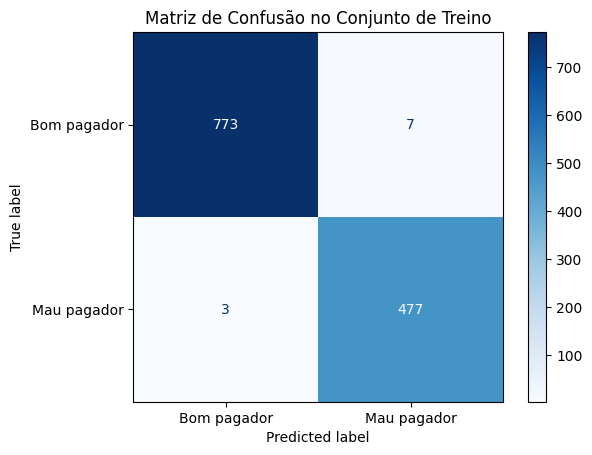

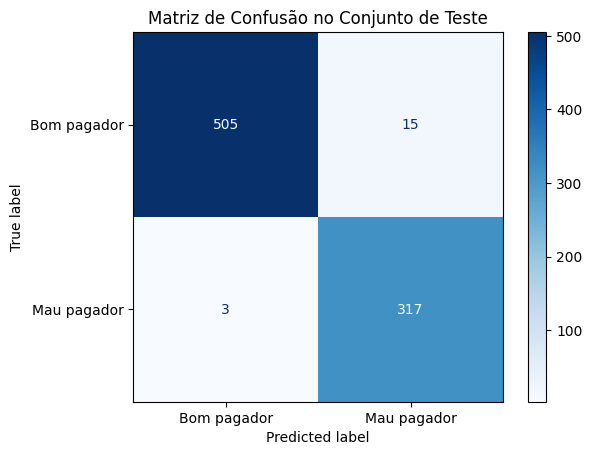

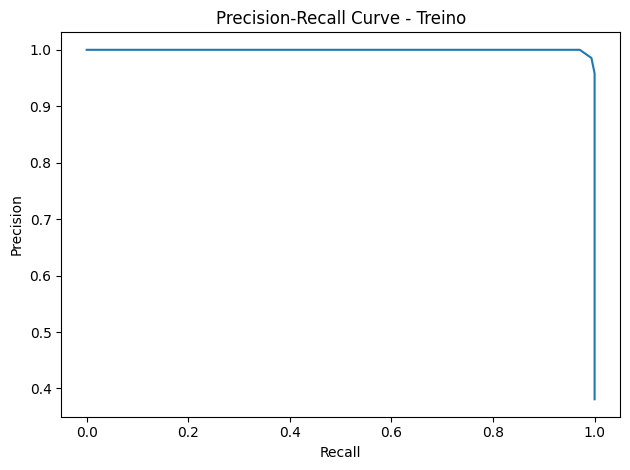

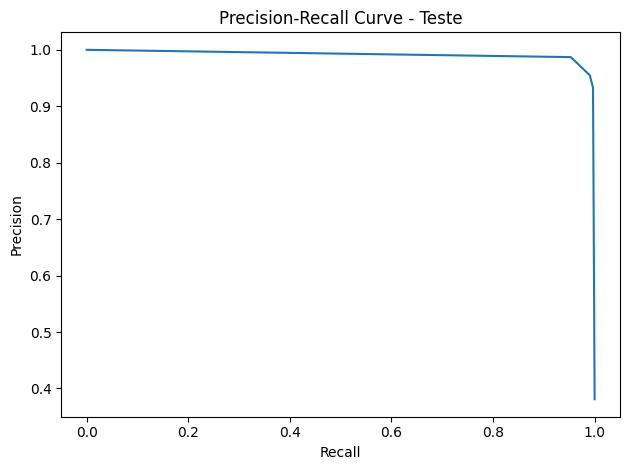

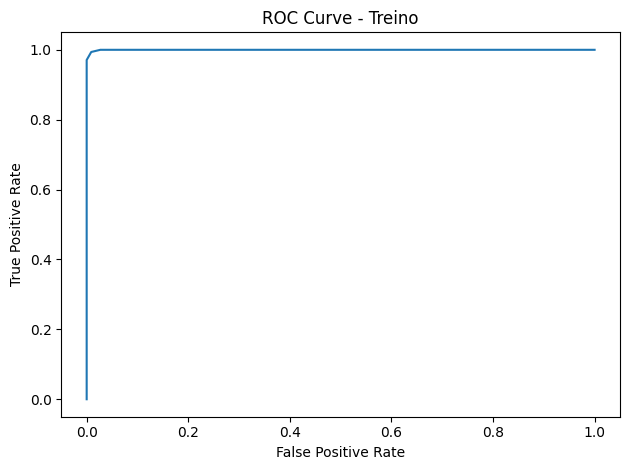

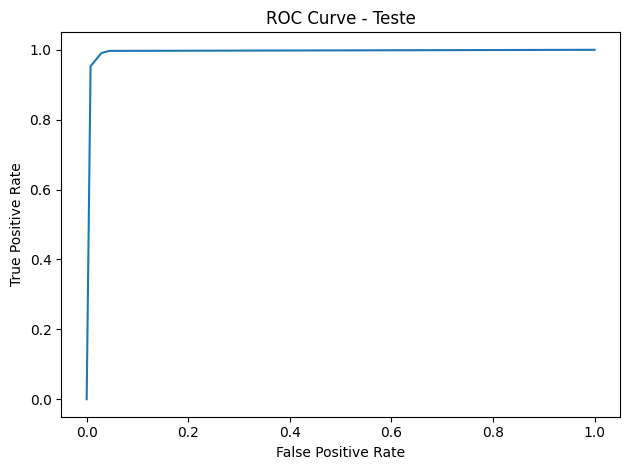

In [95]:
y_pred_train  = best_model.predict(x_train)
y_proba_train = best_model.predict_proba(x_train)[:,1]
y_pred  = best_model.predict(x_test)
y_proba = best_model.predict_proba(x_test)[:,1]

#Avaliação no conjunto de treino
disp = ConfusionMatrixDisplay.from_estimator(
    best_model,        # pipeline ou modelo já treinado
    x_train,            # features do treino
    y_train,            # rótulos verdadeiros
    display_labels=["Bom pagador", "Mau pagador"],  # nomes para as classes
    cmap="Blues",      # estilo de cores (opcional)
    normalize=None     # ou 'true' para matriz normalizada
)
disp.ax_.set_title("Matriz de Confusão no Conjunto de Treino")
plt.show()

#Avaliação no conjunto de teste
disp = ConfusionMatrixDisplay.from_estimator(
    best_model,        # pipeline ou modelo já treinado
    x_test,            # features do teste
    y_test,            # rótulos verdadeiros
    display_labels=["Bom pagador", "Mau pagador"],  # nomes para as classes
    cmap="Blues",      # estilo de cores (opcional)
    normalize=None     # ou 'true' para matriz normalizada
)
disp.ax_.set_title("Matriz de Confusão no Conjunto de Teste")
plt.show()

precision, recall, _ = precision_recall_curve(y_train, y_proba_train)
plt.figure()
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve - Treino")
plt.tight_layout()
plt.show()

precision, recall, _ = precision_recall_curve(y_test, y_proba)
plt.figure()
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve - Teste")
plt.tight_layout()
plt.show()

# Curva ROC
fpr, tpr, _ = roc_curve(y_train, y_proba_train)
plt.figure()
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Treino")
plt.tight_layout()
plt.show()

# Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure()
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Teste")
plt.tight_layout()
plt.show()

- Acima, conseguimos ver que os resultados extremamente bons não foram apenas para o conjunto de treino, mas também para o teste.
- Como eu comentei no README eu acredito que apésar de ser absurdo um resultado desse, ele foi obtido, pois existia uma resposta correta para o problema que foi gerado pelo nosso professor.
- Caso os dados não fossem sintéticos e eu soubesse que existe uma resposta, eu acharia EXTREMAMENTE estranho, e que eu provavelmente deixei passar algo despercebido que vazou a resposta pros meus dados.

### Classificação de novos clientes e interpretabilidade

In [88]:
novo_cliente = x_test.iloc[[33]]
pred = best_model.predict(novo_cliente)
proba     = best_model.predict_proba(novo_cliente)

print("Classe prevista:", pred[0])
print("Probabilidades de ser mau =", float(proba[0][1]))

Classe prevista: 1
Probabilidades de ser mau = 0.6666666666666666


In [89]:
sel = best_model.named_steps['select']
knn = best_model.named_steps['knn']
X_new_sel = sel.transform(novo_cliente)
dist, idxs = knn.kneighbors(X_new_sel, n_neighbors=knn.n_neighbors)
for d, idx in zip(dist[0], idxs[0]):
    print(f"Vizinho idx={idx}, distância={d:.3f}, classe treino={y_train.iloc[idx]}")

Vizinho idx=492, distância=0.520, classe treino=1
Vizinho idx=875, distância=0.609, classe treino=0
Vizinho idx=1028, distância=0.697, classe treino=1


### Vou explicar como funciona essa predição e a interpretação:

## Predição:
- Primeiramente Fazemos a predição de um novo cliente e caso a probabilidade de ele ser mau seja >= 0.5, então classificamos ele como mau.
- Existem técnicas para trocar ponte de corte e etc, mas nosso modelo ja é bom e simples o suficiente.
- Além disso as probabilidades só podem ser 4: (0, 0.333, 0.666, 1), pois estamos utilizando 3 pontos vizinhos para fazer a predição

## Interpretabilidade:
- A interpretabilidade do KNN se da ao comparar ele com seus k vizinhos mais próximos, no caso estamos com k = 3
- No exemplo que eu utilizei, temos que o cliente novo número 33 tem 2 vizinhos com a classe 1 (mau pagador) e 1 vizinho com a classe 0 (bom pagador), portanto a probabilidade de ele ser mau pagador é 0.666 >= 0.5 isso implica que classificamos ele como mau pagador.